# Setup

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Loading and exploring the data

In [3]:
def load_data(filepath):
    data = pd.read_csv(filepath)
    return data

def explore_data(data):
    print(data.head().T)
    print(data.describe())
    print(data.info())

# Visualizing the data

In [4]:
def plot_histograms(data):
    data.hist(bins=15, figsize=(15, 10))
    plt.show()

def plot_correlation_matrix(data):
    plt.figure(figsize=(12, 8))
    sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
    plt.show()

def plot_feature_relationships(data, target):
    for column in data.columns[:-1]:
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=target, y=column, data=data)
        plt.title(f'Relationship between wine quality and {column}')
        plt.show()

# Preprocessing and feature engineering

In [5]:
def scale_features(data, target):
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(data.drop(target, axis=1))
    data_scaled = pd.DataFrame(features_scaled, columns=data.columns[:-1])
    data_scaled[target] = data[target]
    return data_scaled

# Splitting the dataset

In [6]:
def split_data(data, target, test_size=0.2, random_state=42):
    X = data.drop(target, axis=1)
    y = data[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

# Training the model

In [7]:
def train_model(X_train, y_train):
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    return model

# Evaluating the model

In [8]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.show()
    
    report = classification_report(y_test, y_pred)
    print("Classification Report:")
    print(report)

# Cross Validation

In [9]:
def cross_validate_model(model, X, y, cv=5):
    scores = cross_val_score(model, X, y, cv=cv)
    print("Average Accuracy with CV:", np.mean(scores))

In [10]:
# Main function for running the pipeline
def main(filepath):
    data = load_data(filepath)
    explore_data(data)
    plot_histograms(data)
    plot_correlation_matrix(data)
    plot_feature_relationships(data, 'quality')
    
    data_scaled = scale_features(data, 'quality')
    X_train, X_test, y_train, y_test = split_data(data_scaled, 'quality')
    model = train_model(X_train, y_train)
    evaluate_model(model, X_test, y_test)
    cross_validate_model(model, data_scaled.drop('quality', axis=1), data_scaled['quality'])

                            0        1       2       3        4
fixed_acidity          7.4000   7.8000   7.800  11.200   7.4000
volatile_acidity       0.7000   0.8800   0.760   0.280   0.7000
citric_acid            0.0000   0.0000   0.040   0.560   0.0000
residual_sugar         1.9000   2.6000   2.300   1.900   1.9000
chlorides              0.0760   0.0980   0.092   0.075   0.0760
free_sulfur_dioxide   11.0000  25.0000  15.000  17.000  11.0000
total_sulfur_dioxide  34.0000  67.0000  54.000  60.000  34.0000
density                0.9978   0.9968   0.997   0.998   0.9978
pH                     3.5100   3.2000   3.260   3.160   3.5100
sulphates              0.5600   0.6800   0.650   0.580   0.5600
alcohol                9.4000   9.8000   9.800   9.800   9.4000
quality                5.0000   5.0000   5.000   6.000   5.0000
       fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307      

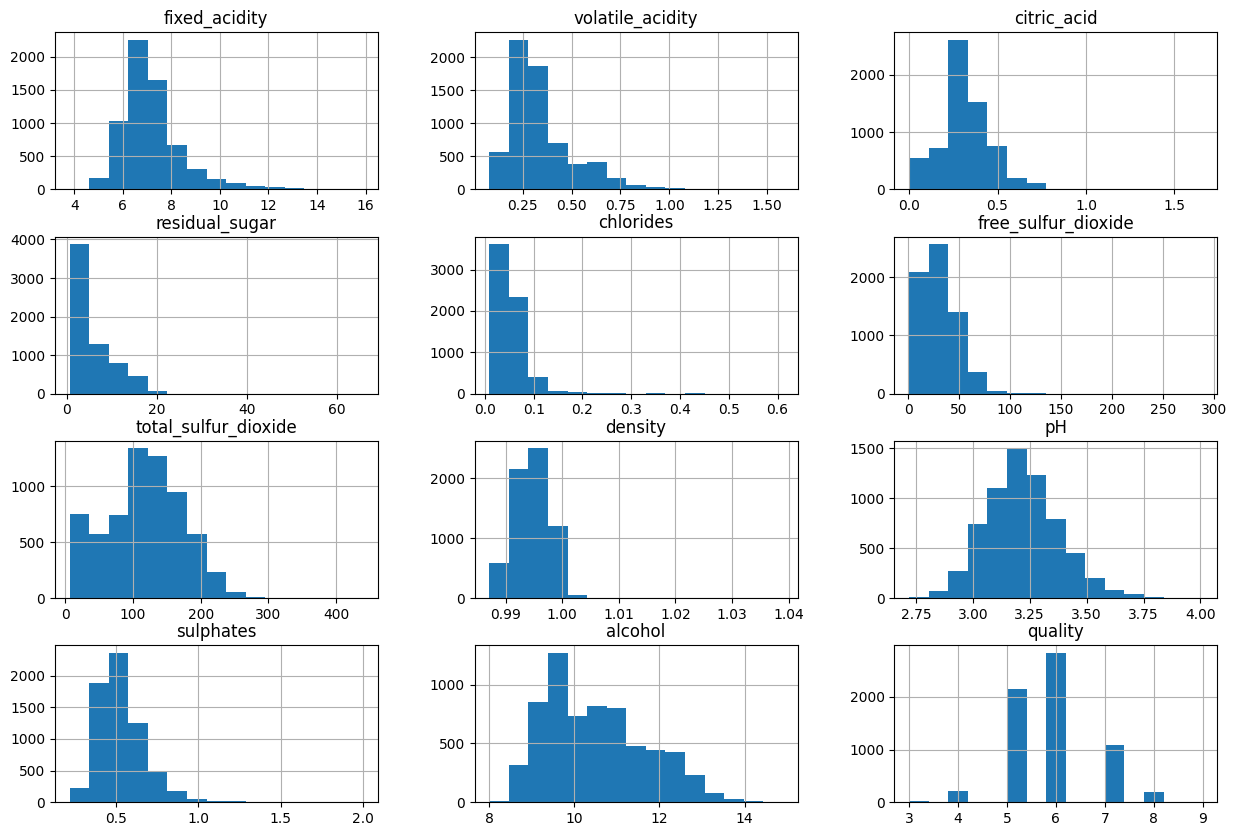

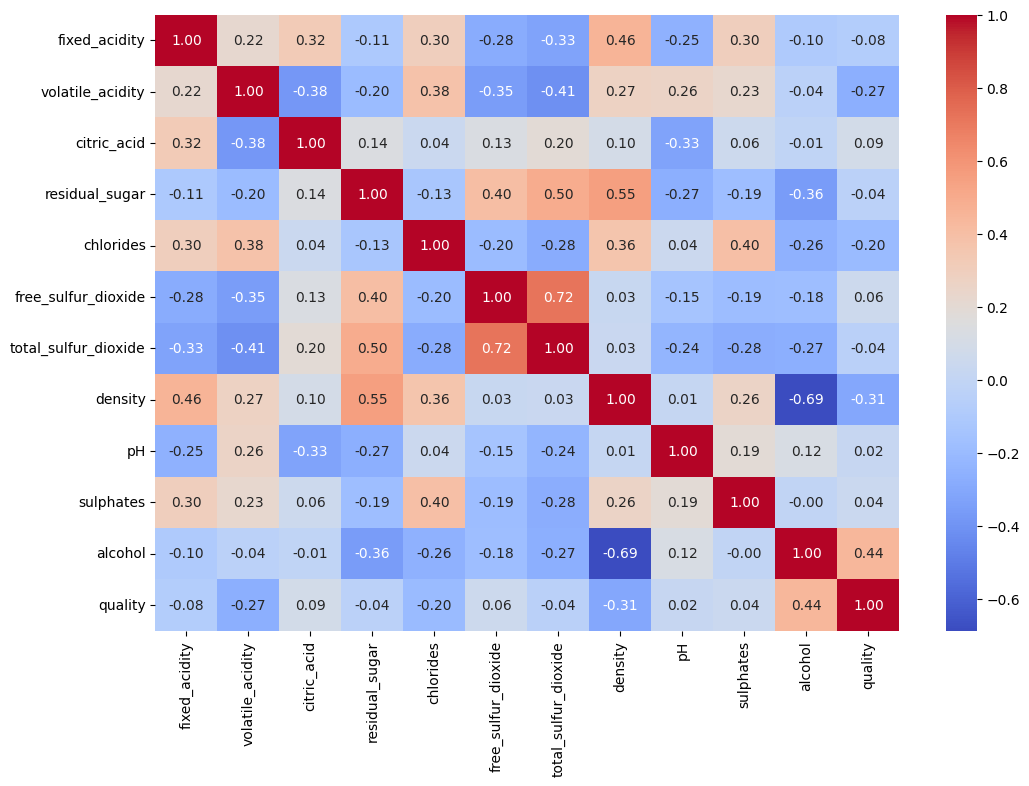

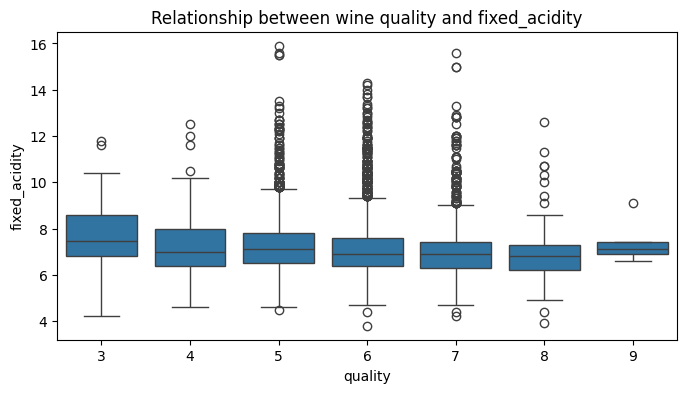

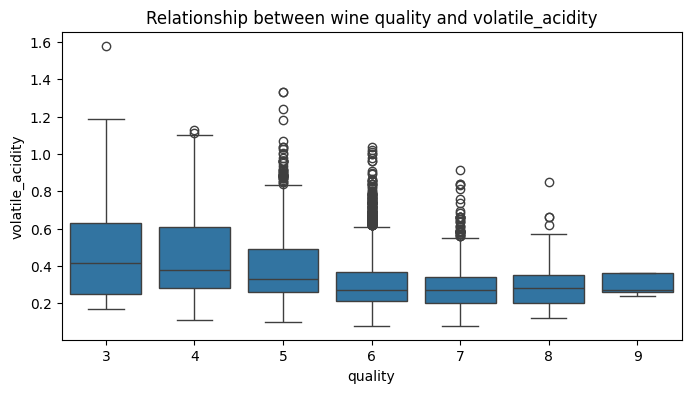

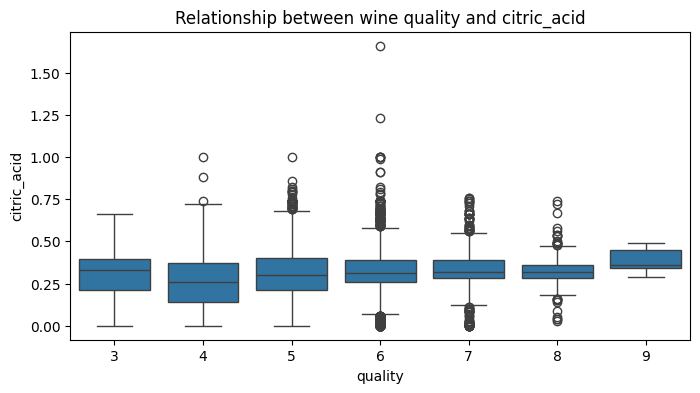

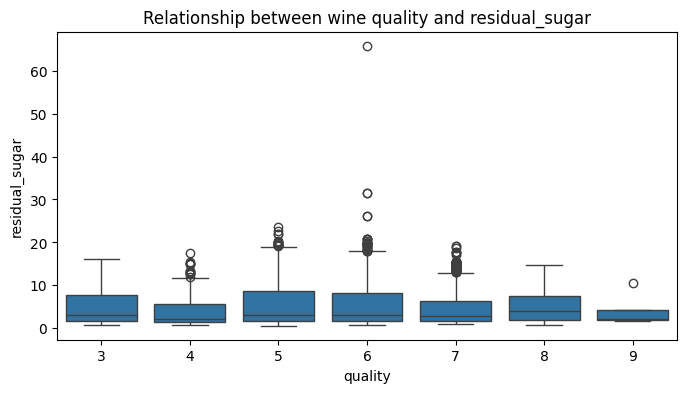

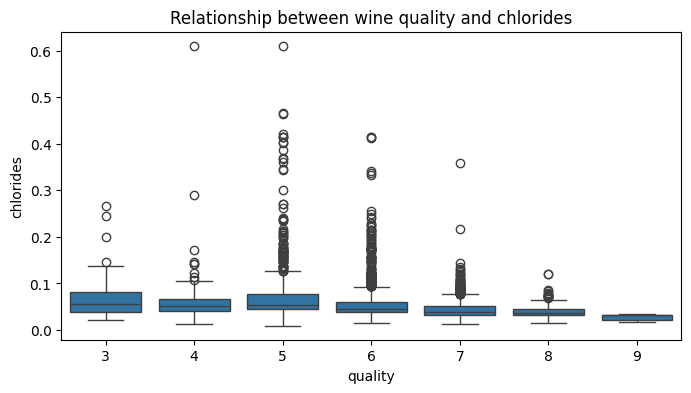

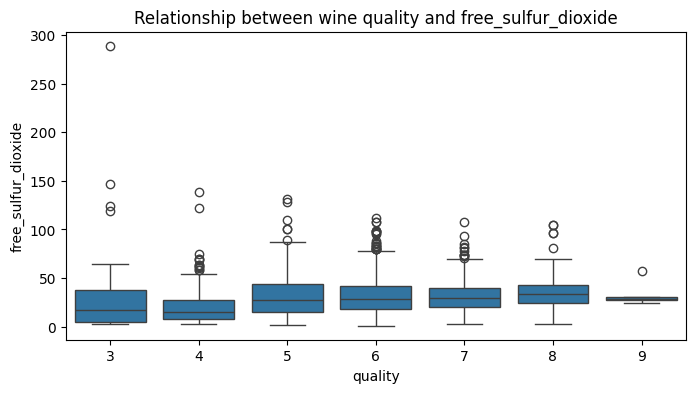

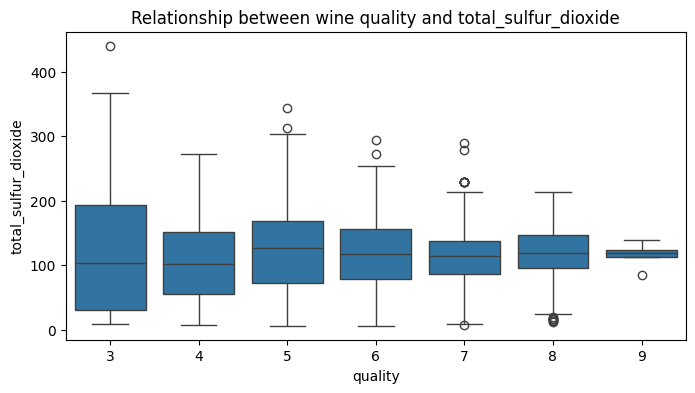

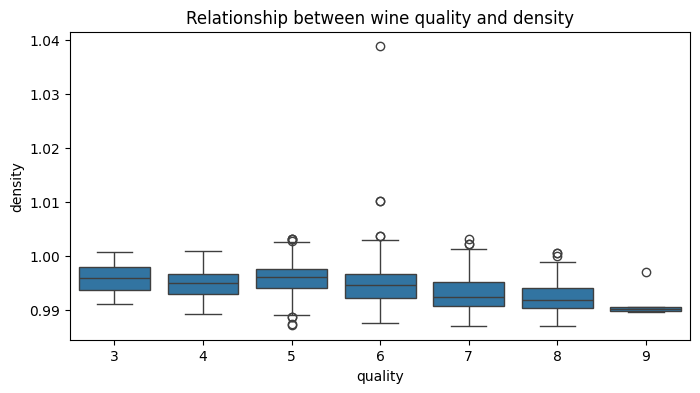

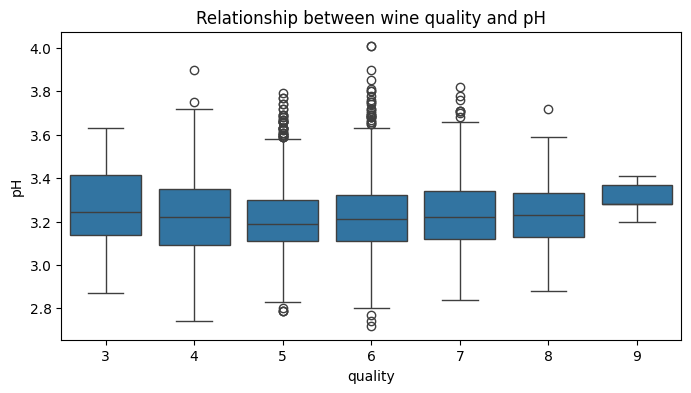

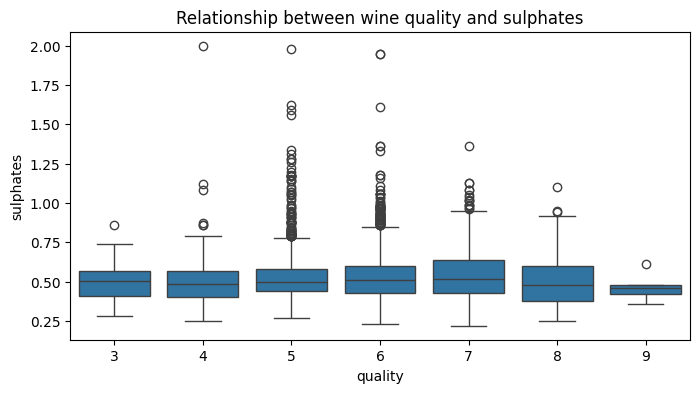

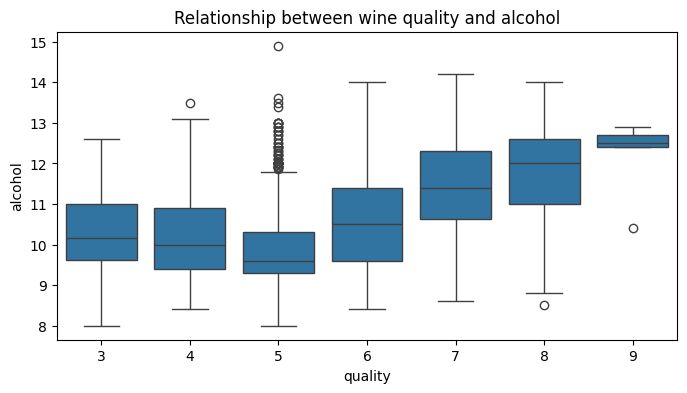

Confusion Matrix:


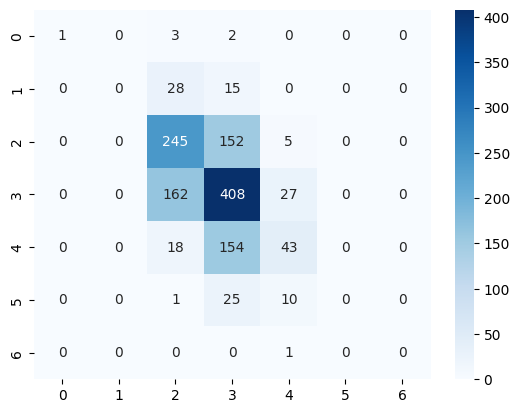

d:\Training\ITESM\MLOps_ITESM\practice3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Training\ITESM\MLOps_ITESM\practice3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Training\ITESM\MLOps_ITESM\practice3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

Classification Report:
              precision    recall  f1-score   support

           3       1.00      0.17      0.29         6
           4       0.00      0.00      0.00        43
           5       0.54      0.61      0.57       402
           6       0.54      0.68      0.60       597
           7       0.50      0.20      0.29       215
           8       0.00      0.00      0.00        36
           9       0.00      0.00      0.00         1

    accuracy                           0.54      1300
   macro avg       0.37      0.24      0.25      1300
weighted avg       0.50      0.54      0.50      1300

Average Accuracy with CV: 0.4988595961390418


In [11]:
main(filepath=r'D:\Training\ITESM\MLOps_ITESM\wine_ml_pipeline\data\raw\wine_quality_df.csv')